In [139]:
import pandas as pd
import cv2
from pathlib2 import Path
from sewar.full_ref import vifp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List
from scipy.interpolate import UnivariateSpline
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

from reliabilitycli.src.utils.metric import performance_area
from reliabilitycli.src.constants.imagenet_16_class_map import imagenet_16_class_wnid_to_category
from reliabilitycli.src.workspace import Workspace
from reliabilitycli.datasets.imagenet import ImagenetDatasetInfo


1. Sample Images
2. Evaluate (output csv)
3. Analysis

In [140]:
sns.set_style("whitegrid")

In [141]:
model_name = "Geirhos2018_SIN"
result_csv = "results/contrast/Geirhos2018_SIN_corruption.csv"
model_name = "stdr50"
result_csv = "results/contrast/standard_r50_corruption.csv"
# model_name = "Hendrycks2020Many"
# result_csv = "results/contrast/Hendrycks2020Many_corruption.csv"

# model_name = "Hendrycks2020AugMix"
# result_csv = "results/contrast/Hendrycks2020AugMix_corruption.csv"
# model_name = "torch-resnet50"
# result_csv = "results/contrast/torch-resnet50.csv"


model_name = "Hendrycks2020AugMix"
result_csv = "results/gaussian_noise/Hendrycks2020AugMix.csv"

model_name = "R50Corrupt"
result_csv = "results/gaussian_noise/R50Corrupt.csv"

# model_name = "resnet50"
# result_csv = "results/gaussian_noise/default_resnet50.csv"

In [142]:
df = pd.read_csv(Path('../workspace') / result_csv, index_col=0)
df

,orig_pred,transformed_pred,label,image_path,transformation_type,transformation_parameter,vd_score
0,216,296,216,/home/user/datasets/ImageNet/val/n02101556/I...,gaussian_noise,716,0.970499
1,1,904,1,/home/user/datasets/ImageNet/val/n01443537/I...,gaussian_noise,794,0.982044
2,941,850,941,/home/user/datasets/ImageNet/val/n07717410/I...,gaussian_noise,513,0.962608
3,707,794,707,/home/user/datasets/ImageNet/val/n03902125/I...,gaussian_noise,652,0.971039
4,85,904,85,/home/user/datasets/ImageNet/val/n01806567/I...,gaussian_noise,857,0.976478
...,...,...,...,...,...,...,...
24995,571,571,571,/home/user/datasets/ImageNet/val/n03425413/I...,gaussian_noise,95,0.783358
24996,768,904,768,/home/user/datasets/ImageNet/val/n04118538/I...,gaussian_noise,807,0.972427
24997,676,904,676,/home/user/datasets/ImageNet/val/n03803284/I...,gaussian_noise,922,0.984632
24998,320,320,320,/home/user/datasets/ImageNet/val/n02268853/I...,gaussian_noise,146,0.829349


In [143]:
bins_dfs = []
for i in range(100):
	bins_dfs.append(df[(df['vd_score'] > i / 100) & (df['vd_score'] < ((i + 1) / 100))])

In [144]:
def calculate_acc(df: pd.DataFrame):
	return (df['transformed_pred'] == df['label']).sum() / len(df)

def calculate_orig_acc(df: pd.DataFrame):
	return (df['orig_pred'] == df['label']).sum() / len(df)

In [145]:
orig_accs = [calculate_orig_acc(bin_df) for bin_df in bins_dfs]

/home/user/anaconda3/envs/reliabilitycli/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [146]:
accs = [calculate_acc(bin_df) for bin_df in bins_dfs]

/home/user/anaconda3/envs/reliabilitycli/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


Text(0.4, 0.2, '0.65')

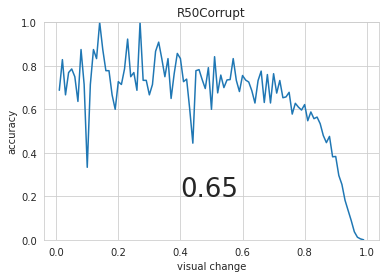

In [147]:
ax = sns.lineplot(x=np.arange(100) / 100, y=accs)
ax.set_xlabel('visual change')
ax.set_ylabel('accuracy')
ax.set_title(model_name)
# ax.set_xlim(100)
ax.set_ylim(0, 1)
perf_area = performance_area(accs)
ax.text(0.4, 0.2, round(perf_area, 2), fontsize=26)
# plt.text(20, 50, '$A_m - A_{m-h}$', fontsize=16)


In [148]:
print('transform vs original', (df['transformed_pred'] == df['orig_pred']).sum())
print('accuracy', (df['transformed_pred'] == df['label']).sum())
print('original acc', (df['label'] == df['orig_pred']).sum())

transform vs original 5582
accuracy 4900
original acc 18793


In [149]:
((df['transformed_pred'] == df['label']) == (df['transformed_pred'] == df['orig_pred'])).sum()

23818

# 16 Class Version

In [150]:
# imagenet_16_class_category_to_id, imagenet_16_class_map_id_to_category
# imagenet_16_class_map_id_to_category
dataset_root = Path("/home/user/datasets")
imagenet_info = ImagenetDatasetInfo(data_root=dataset_root / 'ImageNet' / 'val',
                    original_data_root=dataset_root / 'ImageNet',
                    original_split='val')

In [151]:
idx_to_wnid = {idx: wnid for wnid, idx in imagenet_info.wnid_to_idx.items()}

In [152]:
imagenet_16_class_wnid_to_category
idx_to_wnid
# map wnid to idx, then idx to 16-class category
idx_to_categroy = {idx: imagenet_16_class_wnid_to_category[wnid] for idx, wnid in idx_to_wnid.items() if wnid in imagenet_16_class_wnid_to_category.keys()}
idx_to_categroy

{8: 'bird',
 10: 'bird',
 11: 'bird',
 12: 'bird',
 13: 'bird',
 14: 'bird',
 15: 'bird',
 16: 'bird',
 18: 'bird',
 19: 'bird',
 20: 'bird',
 22: 'bird',
 23: 'bird',
 24: 'bird',
 80: 'bird',
 81: 'bird',
 82: 'bird',
 83: 'bird',
 87: 'bird',
 88: 'bird',
 89: 'bird',
 90: 'bird',
 91: 'bird',
 92: 'bird',
 93: 'bird',
 94: 'bird',
 95: 'bird',
 96: 'bird',
 98: 'bird',
 99: 'bird',
 100: 'bird',
 127: 'bird',
 128: 'bird',
 129: 'bird',
 130: 'bird',
 131: 'bird',
 132: 'bird',
 133: 'bird',
 135: 'bird',
 136: 'bird',
 137: 'bird',
 138: 'bird',
 139: 'bird',
 140: 'bird',
 141: 'bird',
 142: 'bird',
 143: 'bird',
 144: 'bird',
 145: 'bird',
 152: 'dog',
 153: 'dog',
 154: 'dog',
 155: 'dog',
 156: 'dog',
 157: 'dog',
 158: 'dog',
 159: 'dog',
 160: 'dog',
 161: 'dog',
 162: 'dog',
 163: 'dog',
 164: 'dog',
 165: 'dog',
 166: 'dog',
 167: 'dog',
 168: 'dog',
 169: 'dog',
 170: 'dog',
 171: 'dog',
 172: 'dog',
 173: 'dog',
 174: 'dog',
 175: 'dog',
 176: 'dog',
 177: 'dog',
 178: '

In [153]:
imagenet_16_class_df = pd.DataFrame(data={"idx": idx_to_categroy.keys(), "label_category": idx_to_categroy.values()})
imagenet_16_class_df

,idx,label_category
0,8,bird
1,10,bird
2,11,bird
3,12,bird
4,13,bird
...,...,...
202,898,bottle
203,899,bottle
204,901,bottle
205,907,bottle


In [154]:
new_result_df = df.merge(imagenet_16_class_df, left_on='label', right_on='idx', how='right')
new_result_df

,orig_pred,transformed_pred,label,image_path,transformation_type,transformation_parameter,vd_score,idx,label_category
0,8,608,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,674,0.974052,8,bird
1,7,904,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,949,0.983817,8,bird
2,8,904,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,570,0.977297,8,bird
3,8,332,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,271,0.942894,8,bird
4,594,505,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,682,0.963679,8,bird
...,...,...,...,...,...,...,...,...,...
5149,780,536,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,108,0.800451,914,boat
5150,914,904,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,935,0.984353,914,boat
5151,914,904,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,927,0.988326,914,boat
5152,914,562,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,619,0.974464,914,boat


In [155]:
new_result_df['orig_pred_category'] = new_result_df.apply(lambda row: idx_to_categroy[row['orig_pred']] if row['orig_pred'] in idx_to_categroy else None, axis=1)
new_result_df['transformed_pred_category'] = new_result_df.apply(lambda row: idx_to_categroy[row['transformed_pred']] if row['transformed_pred'] in idx_to_categroy else None, axis=1)
new_result_df

,orig_pred,transformed_pred,label,image_path,transformation_type,transformation_parameter,vd_score,idx,label_category,orig_pred_category,transformed_pred_category
0,8,608,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,674,0.974052,8,bird,bird,None
1,7,904,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,949,0.983817,8,bird,None,None
2,8,904,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,570,0.977297,8,bird,bird,None
3,8,332,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,271,0.942894,8,bird,bird,None
4,594,505,8,/home/user/datasets/ImageNet/val/n01514859/I...,gaussian_noise,682,0.963679,8,bird,None,None
...,...,...,...,...,...,...,...,...,...,...,...
5149,780,536,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,108,0.800451,914,boat,None,None
5150,914,904,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,935,0.984353,914,boat,boat,None
5151,914,904,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,927,0.988326,914,boat,boat,None
5152,914,562,914,/home/user/datasets/ImageNet/val/n04612504/I...,gaussian_noise,619,0.974464,914,boat,boat,None


In [156]:
# experiments
(new_result_df['label_category'] == new_result_df['orig_pred_category']).sum()

4837

In [157]:
def calculate_category_acc(df: pd.DataFrame):
	return (df['transformed_pred_category'] == df['label_category']).sum() / len(df)

def calculate_orig_category_acc(df: pd.DataFrame):
	return (df['orig_pred_category'] == df['label_category']).sum() / len(df)

In [158]:
bins_dfs = []
for i in range(100):
	bins_dfs.append(new_result_df[(new_result_df['vd_score'] > i / 100) & (new_result_df['vd_score'] < ((i + 1) / 100))])
orig_accs = [calculate_orig_category_acc(bin_df) for bin_df in bins_dfs]
accs = [calculate_category_acc(bin_df) for bin_df in bins_dfs]

/home/user/anaconda3/envs/reliabilitycli/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/home/user/anaconda3/envs/reliabilitycli/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


Text(0.4, 0.2, '0.85')

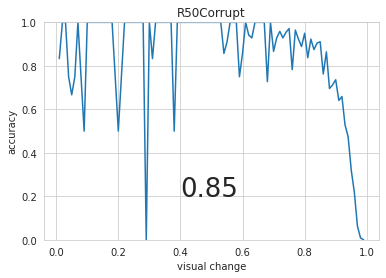

In [159]:
ax = sns.lineplot(x=np.arange(100) / 100, y=accs)
ax.set_xlabel('visual change')
ax.set_ylabel('accuracy')
ax.set_title(model_name)
# ax.set_xlim(100)
ax.set_ylim(0, 1)
perf_area = performance_area(accs)
ax.text(0.4, 0.2, round(perf_area, 2), fontsize=26)
# plt.text(20, 50, '$A_m - A_{m-h}$', fontsize=16)

In [160]:
imagenet16cls_idx = set(imagenet_16_class_df['idx'].unique().tolist())
# imagenet16cls_idx
sum([label in imagenet16cls_idx for label in df['label'].tolist()])

5154

Out of the 1000 original imagenet classes, the 16-categories subset only has 207 classes.

4/5 of experiment results are discarded

In [161]:
len(imagenet16cls_idx)

207

# Analysis on Human Data

In [162]:
human_df = pd.read_csv('../workspace/human_results/exp_results.csv')
human_df

,img_name,label,orig_pred,transformed_pred,vd_score
0,https://pilotsixteenclasses.s3.amazonaws.com/g...,truck,truck,car,0.890110
1,https://pilotsixteenclasses.s3.amazonaws.com/g...,truck,truck,car,0.890110
2,https://pilotsixteenclasses.s3.amazonaws.com/g...,truck,truck,truck,0.890110
3,https://pilotsixteenclasses.s3.amazonaws.com/g...,truck,truck,truck,0.890110
4,https://pilotsixteenclasses.s3.amazonaws.com/g...,truck,truck,car,0.890110
...,...,...,...,...,...
2951,https://pilotsixteenclasses.s3.amazonaws.com/g...,bird,bird,bird,0.770824
2952,https://pilotsixteenclasses.s3.amazonaws.com/g...,bird,bird,bird,0.770824
2953,https://pilotsixteenclasses.s3.amazonaws.com/g...,bird,bird,bird,0.770824
2954,https://pilotsixteenclasses.s3.amazonaws.com/g...,bird,bird,bird,0.770824


<AxesSubplot:>

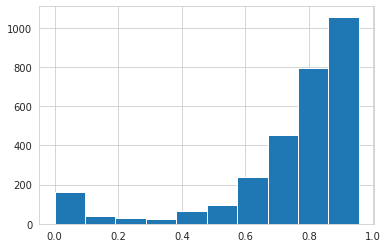

In [163]:
human_df['vd_score'].hist()

<AxesSubplot:>

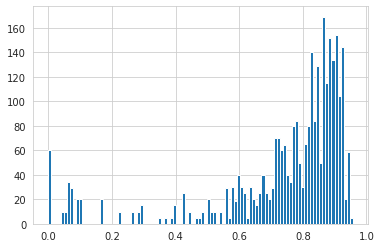

In [164]:
human_df['vd_score'].hist(bins=100)

In [165]:
bins_dfs = []
for i in range(20):
	bins_dfs.append(human_df[(human_df['vd_score'] > i / 20) & (human_df['vd_score'] < ((i + 1) / 20))])

Text(0.4, 0.2, '0.18')

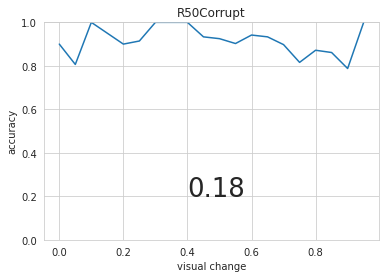

In [166]:
orig_accs = [calculate_orig_acc(bin_df) for bin_df in bins_dfs]
accs = [calculate_acc(bin_df) for bin_df in bins_dfs]
ax = sns.lineplot(x=np.arange(20) / 20, y=accs)
ax.set_xlabel('visual change')
ax.set_ylabel('accuracy')
ax.set_title(model_name)
# ax.set_xlim(20)
ax.set_ylim(0, 1)
perf_area = performance_area(accs)
ax.text(0.4, 0.2, round(perf_area, 2), fontsize=26)
# plt.text(20, 50, '$A_m - A_{m-h}$', fontsize=16)

In [167]:
# accs
# plt.ylim(0, 1)
# sns.lineplot(x=np.linspace(0, 1, 20), y=accs)
# human_df

In [168]:
np.array(accs)

array([0.9       , 0.80645161, 1.        , 0.95      , 0.9       ,
       0.91428571, 1.        , 1.        , 1.        , 0.93333333,
       0.925     , 0.90265487, 0.94166667, 0.93333333, 0.89761092,
       0.81597222, 0.87174349, 0.86132512, 0.78768577, 1.        ])

# Spline and Confidence Interval

In [169]:
bins_dfs = []
n_bins = 20
for i in range(n_bins):
	bins_dfs.append(new_result_df[(new_result_df['vd_score'] > i / n_bins) & (new_result_df['vd_score'] < ((i + 1) / n_bins))])
ml_orig_accs = [calculate_orig_category_acc(bin_df) for bin_df in bins_dfs]
ml_accs = [calculate_category_acc(bin_df) for bin_df in bins_dfs]

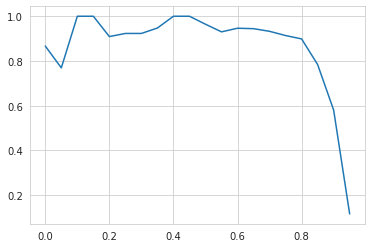

In [170]:
ax = sns.lineplot(x=np.arange(n_bins) / n_bins, y=ml_accs)

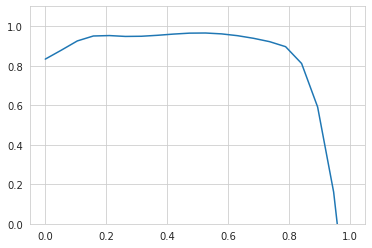

In [171]:
plt.ylim(0, 1.1)
ml_spl = UnivariateSpline(np.arange(n_bins) / n_bins, ml_accs, s=0.03)
x = np.linspace(0, 1, 20)
ax = sns.lineplot(x=x, y=ml_spl(x))

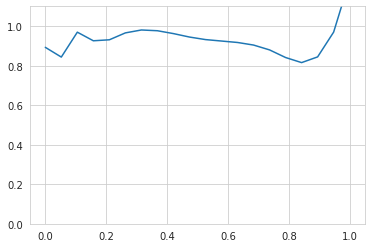

In [172]:
bins_dfs = []
for i in range(n_bins):
	bins_dfs.append(human_df[(human_df['vd_score'] > i / n_bins) & (human_df['vd_score'] < ((i + 1) / n_bins))])
human_orig_accs = [calculate_orig_acc(bin_df) for bin_df in bins_dfs]
human_accs = [calculate_acc(bin_df) for bin_df in bins_dfs]
plt.ylim(0, 1.1)
human_spl = UnivariateSpline(np.arange(n_bins) / n_bins, human_accs, s=0.02)
x = np.linspace(0, 1, 20)
ax = sns.lineplot(x=x, y=human_spl(x))

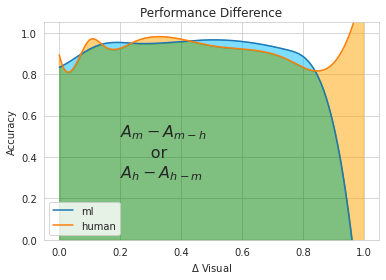

In [173]:
# def spline(x: List[float], y: List[float], smoothing_factor: float=None):
#     spl = UnivariateSpline(x, y)
#     if smoothing_factor is not None:
#         spl.set_smoothing_factor(smoothing_factor)
#     xs = np.linspace(-3, 3, 1000)
#     return spl

# ml_y = [0.95, 0.95, 0.90, 0.70, 0.30, 0.10]
# ml_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
# human_y = [0.80, 0.80, 0.80, 0.75, 0.60, 0.50]
# human_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
# ml_spl = spline(ml_x, ml_y)
# human_spl = spline(human_x, human_y)
x = np.linspace(0, 100, 10000) / 100
fig = plt.figure()
# fig.tight_layout() 
# ax = plt.subplot()
plt.ylim(0, 1.05)
ml_pred = ml_spl(x)
human_pred = human_spl(x)
plt.plot(x, ml_pred, label='ml')
plt.plot(x, human_pred, label='human')
plt.title('Performance Difference')
plt.legend()
plt.fill_between(x, ml_pred, human_pred, where=(human_pred > ml_pred), interpolate=True, alpha=0.5, color="orange")
plt.fill_between(x, ml_pred, human_pred, where=(human_pred < ml_pred), interpolate=True, alpha=0.5, color="deepskyblue")

min_curve = np.minimum(ml_pred, human_pred)
plt.fill_between(x, min_curve, 0, where=(min_curve > 0), interpolate=True, alpha=0.5, color="green")


# plt.text(0.05, 0.85, '$A_{m-h}$', fontsize=22)
# plt.text(0.80, 0.70, '$A_{h-m}$', fontsize=16)
plt.text(0.20, 0.30, '$A_h - A_{h-m}$', fontsize=16)
plt.text(0.20, 0.40, '      or', fontsize=16)
plt.text(0.20, 0.50, '$A_m - A_{m-h}$', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('$\Delta$ Visual')
plt.savefig('x.png')

In [174]:
x = np.linspace(0, 1, 50)
y = np.sin(4 * np.pi * x) + np.random.normal(scale=0.1, size=x.shape)
spline = UnivariateSpline(x, y, s=0)

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Generate some example data
x = np.linspace(0, 1, 50)
y = np.sin(4 * np.pi * x) + np.random.normal(scale=0.1, size=x.shape)

# Fit a spline to the data
spline = UnivariateSpline(x, y, s=0)

# Define a function to generate bootstrap samples
def bootstrap_samples(x, y, n):
    indices = np.random.randint(low=0, high=len(x), size=(n, len(x)))
    print(indices)
    x_samples = x[indices]
    y_samples = y[indices]
    return x_samples, y_samples

# Generate bootstrap samples
n_samples = 1000
x_samples, y_samples = bootstrap_samples(x, y, n_samples)



[[38 24 28 ... 48 15 12]
 [19 39  9 ... 31 10 29]
 [37 35  0 ... 21 47 31]
 ...
 [20 32 12 ... 34 31  4]
 [10 46 19 ...  6 19 28]
 [13 28 30 ... 16 30 39]]


In [176]:
indices = np.random.randint(low=0, high=len(x), size=(1000, len(x)))
x_samples = x[indices]
# x[x_samples]
x_samples

array([[0.04081633, 1.        , 0.34693878, ..., 0.24489796, 0.16326531,
        0.79591837],
       [0.3877551 , 0.48979592, 0.        , ..., 0.97959184, 0.12244898,
        0.2244898 ],
       [0.02040816, 0.57142857, 0.55102041, ..., 0.71428571, 0.75510204,
        0.18367347],
       ...,
       [0.69387755, 0.42857143, 0.65306122, ..., 0.53061224, 0.83673469,
        0.59183673],
       [0.46938776, 0.18367347, 0.95918367, ..., 0.        , 0.24489796,
        0.75510204],
       [0.59183673, 0.44897959, 0.53061224, ..., 0.30612245, 0.04081633,
        0.95918367]])

In [177]:

# Fit splines to the bootstrap samples
splines = [UnivariateSpline(x_sample, y_sample, s=0) for x_sample, y_sample in zip(x_samples, y_samples)]

# Calculate confidence intervals
y_vals = np.array([s(x) for s in splines])
lower_bounds = np.percentile(y_vals, 2.5, axis=0)
upper_bounds = np.percentile(y_vals, 97.5, axis=0)

# Plot the data and the fitted spline with confidence intervals
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='data')
ax.plot(x, spline(x), label='spline fit')
ax.fill_between(x, lower_bounds, upper_bounds, alpha=0.5, label='95% confidence interval')
ax.legend()
plt.show()

ValueError: x must be strictly increasing if s = 0